In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('E_Commerce.csv')
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


# Reached.on.Time_Y.N this is target column

### data preprocessing Basic

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [4]:
df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.nunique()

ID                     10999
Warehouse_block            5
Mode_of_Shipment           3
Customer_care_calls        6
Customer_rating            5
Cost_of_the_Product      215
Prior_purchases            8
Product_importance         3
Gender                     2
Discount_offered          65
Weight_in_gms           4034
Reached.on.Time_Y.N        2
dtype: int64

In [7]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


### As per my observation ID column not required

In [8]:
df.drop(['ID'],axis=1,inplace=True)

In [9]:
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


In [10]:
df.shape

(10999, 11)

In [11]:
df.columns

Index(['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

# EDA

([<matplotlib.patches.Wedge at 0x210cd5d6670>,
 [Text(-0.01429514880238828, 1.0999071091327293, 'male'),
  Text(0.014295148802387655, -1.0999071091327293, 'female')],
 [Text(-0.007797353892211788, 0.5999493322542159, '50.4%'),
  Text(0.007797353892211447, -0.5999493322542159, '49.6%')])

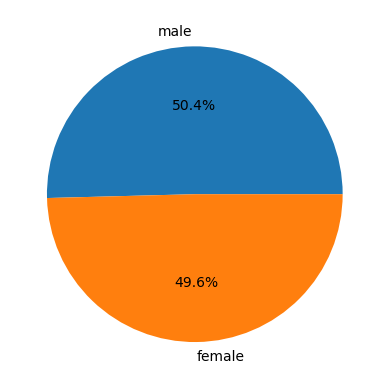

In [12]:
plt.pie(df['Gender'].value_counts(),autopct='%1.1f%%',labels=['male','female'])

In [13]:
df.head(2)

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1


In [14]:
df.columns

Index(['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

## Product properties

<AxesSubplot:xlabel='Cost_of_the_Product', ylabel='Count'>

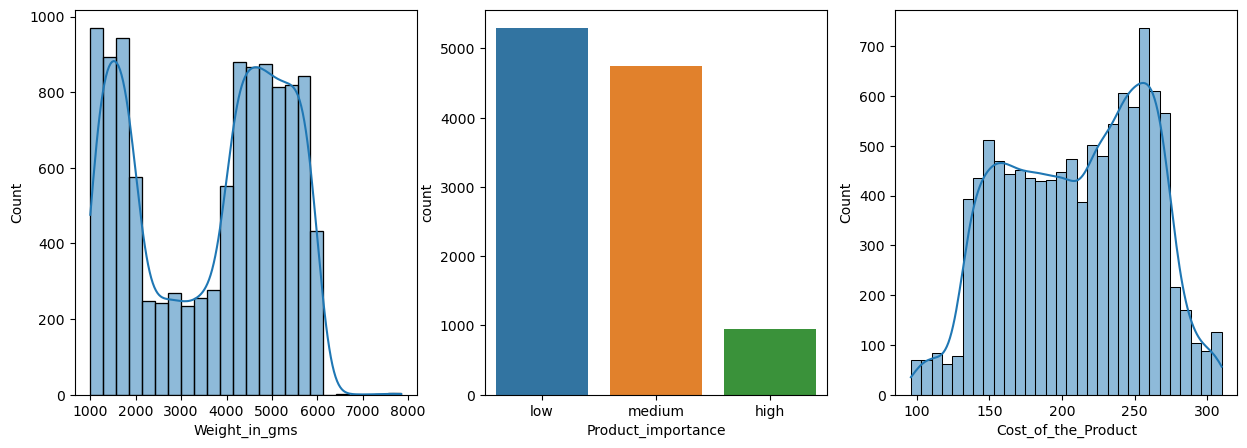

In [15]:
fig,ax=plt.subplots(1,3,figsize=(15,5))
sns.histplot(df['Weight_in_gms'],ax=ax[0],kde=True)
sns.countplot(x='Product_importance',ax=ax[1],data=df)
sns.histplot(df['Cost_of_the_Product'], ax=ax[2], kde=True)

#####**(1) most of the product weight is between 1000 to 2000 and 4000 to 6000**
**(2) most of the product importance is low and medium**
**(3) most of the product have the cost between 150 to 250**

## Logistics

<AxesSubplot:xlabel='Reached.on.Time_Y.N', ylabel='count'>

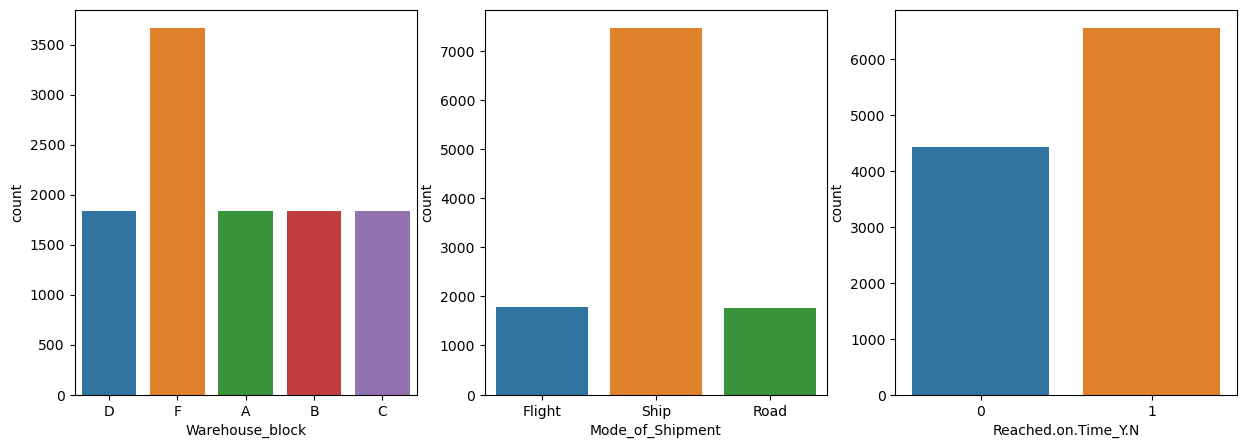

In [16]:
fig,ax=plt.subplots(1,3,figsize=(15,5))
sns.countplot(x='Warehouse_block',data=df,ax=ax[0])
sns.countplot(x='Mode_of_Shipment',data=df,ax=ax[1])
sns.countplot(x='Reached.on.Time_Y.N',data=df,ax=ax[2])

#### F number warehouse have the most produts
#### ship is the highest for mode of shipment
#### Most of the product has reached in time

# Customer Experience

<AxesSubplot:xlabel='Discount_offered', ylabel='Count'>

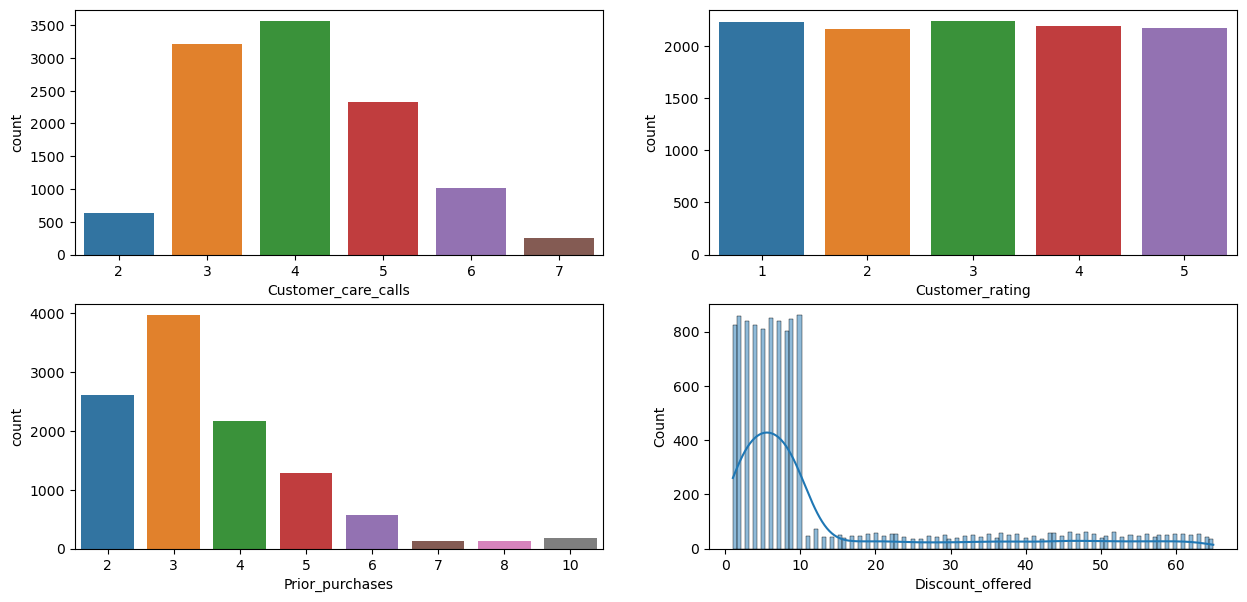

In [17]:
fig,ax=plt.subplots(2,2,figsize=(15,7))
sns.countplot(x='Customer_care_calls',data=df,ax=ax[0,0])
sns.countplot(x='Customer_rating',data=df,ax=ax[0,1])
sns.countplot(x='Prior_purchases',data=df,ax=ax[1,0])
sns.histplot(x='Discount_offered',data=df,ax=ax[1,1],kde=True)

##### 1. As we can see the people have called the customer care highest 4th time the 3 then 5 the 6 then 2 then 7
##### 2. Most of the customer give the rating eqaully but 1&3 is rating is high
##### 3. The third graph is about the prior purchases done by the customers, where we can see that majority of the customers have done 2-3 prior purchases, which means that customers who are having prior purchases, they are satisfied with the service, and they are buying more products
##### 4. most of the product have the discount in between 10%

## Customer Gender and Product Delivery

<AxesSubplot:xlabel='Gender', ylabel='count'>

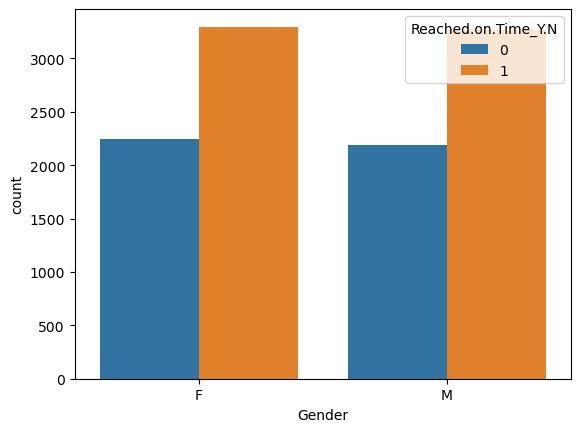

In [18]:
sns.countplot(x='Gender',data=df,hue='Reached.on.Time_Y.N')

#### the product delivery in between male and female is equal

<AxesSubplot:xlabel='Reached.on.Time_Y.N', ylabel='Cost_of_the_Product'>

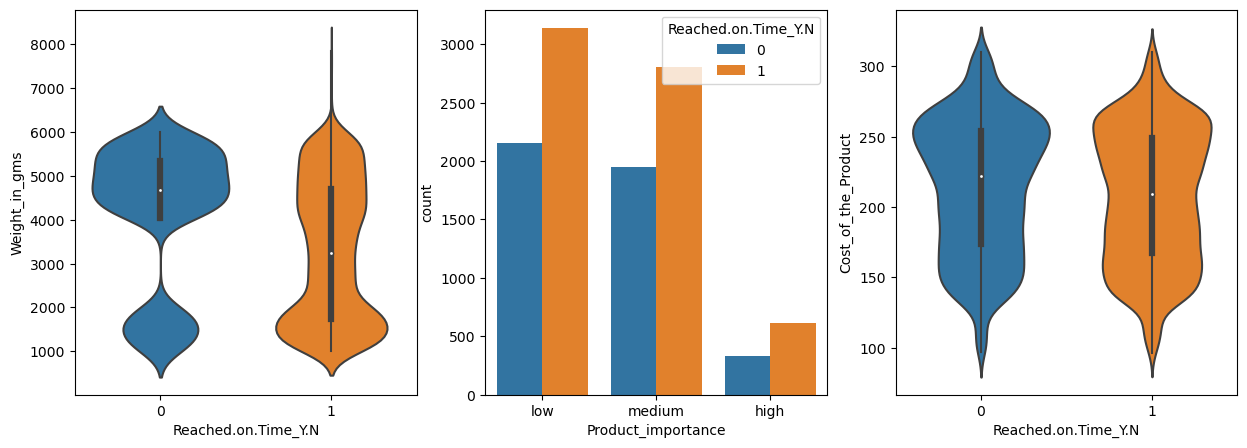

In [19]:
fig,ax=plt.subplots(1,3,figsize=(15,5))
sns.violinplot(y=df['Weight_in_gms'],x=df['Reached.on.Time_Y.N'],ax=ax[0])
sns.countplot(x='Product_importance',data=df,hue='Reached.on.Time_Y.N',ax=ax[1])
sns.violinplot(y=df['Cost_of_the_Product'],x=df['Reached.on.Time_Y.N'],ax=ax[2])

##### the most of the products are delivered in time
##### low medium high products are also delivered in time
##### cost of the product are equal in delivery time ex: not delivered=timely delivered

### Logistics and Product Delivery

<AxesSubplot:xlabel='Mode_of_Shipment', ylabel='count'>

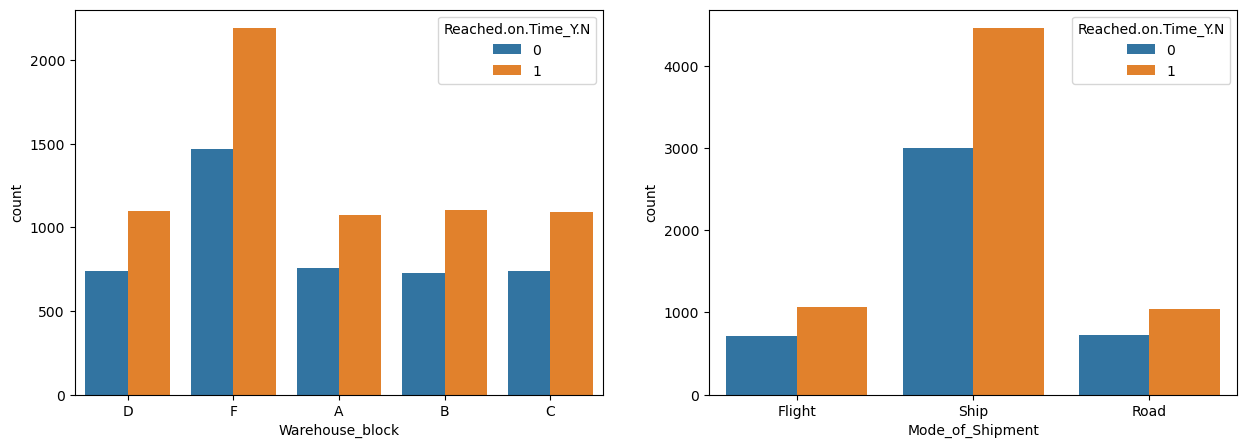

In [20]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='Warehouse_block',data=df,hue='Reached.on.Time_Y.N',ax=ax[0])
sns.countplot(x='Mode_of_Shipment',data=df,hue='Reached.on.Time_Y.N',ax=ax[1])

#### from above plot we can easily says that the product was delivered in time

## Customer Experience and Product Delivery

Text(0.5, 1.0, 'Discount Offered')

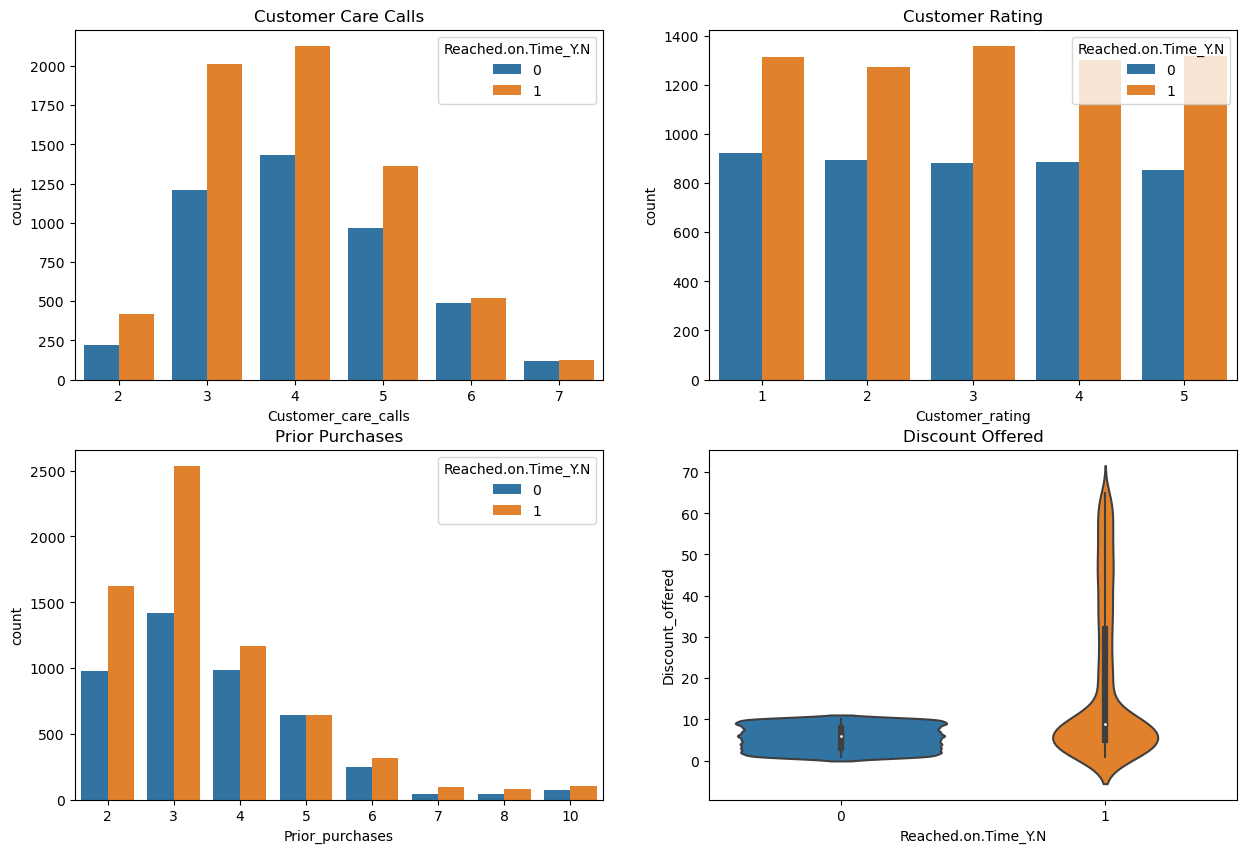

In [21]:
fig, ax = plt.subplots(2,2,figsize=(15,10))
sns.countplot(x = 'Customer_care_calls', data = df, ax=ax[0,0],hue = 'Reached.on.Time_Y.N').set_title('Customer Care Calls')
sns.countplot(x = 'Customer_rating', data = df, ax=ax[0,1],hue = 'Reached.on.Time_Y.N').set_title('Customer Rating')
sns.countplot(x = 'Prior_purchases', data = df, ax=ax[1,0],hue = 'Reached.on.Time_Y.N').set_title('Prior Purchases')
sns.violinplot(x = 'Reached.on.Time_Y.N', y = 'Discount_offered' ,data = df, ax=ax[1,1]).set_title('Discount Offered')

#### the customer who called 7 times have get the product delay but the counts of produts re deliver in time is litiile bit high 

##### the count of products delivery in time ie equa for prior 5 products

# Data Pre-processing

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Warehouse_block      10999 non-null  object
 1   Mode_of_Shipment     10999 non-null  object
 2   Customer_care_calls  10999 non-null  int64 
 3   Customer_rating      10999 non-null  int64 
 4   Cost_of_the_Product  10999 non-null  int64 
 5   Prior_purchases      10999 non-null  int64 
 6   Product_importance   10999 non-null  object
 7   Gender               10999 non-null  object
 8   Discount_offered     10999 non-null  int64 
 9   Weight_in_gms        10999 non-null  int64 
 10  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 945.4+ KB


In [23]:
df.nunique()

Warehouse_block           5
Mode_of_Shipment          3
Customer_care_calls       6
Customer_rating           5
Cost_of_the_Product     215
Prior_purchases           8
Product_importance        3
Gender                    2
Discount_offered         65
Weight_in_gms          4034
Reached.on.Time_Y.N       2
dtype: int64

In [24]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

In [25]:
cols=['Warehouse_block','Mode_of_Shipment','Product_importance','Gender']
for i in cols:
    enc.fit(df[i])
    df[i]=enc.transform(df[i])

In [26]:
df.head(2)

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,3,0,4,2,177,3,1,0,44,1233,1
1,4,0,4,5,216,2,1,1,59,3088,1


In [27]:
df.corr()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
Warehouse_block,1.000000,0.000617,0.014496,0.010169,-0.006679,-0.005262,0.004260,-0.003700,0.009569,0.004086,0.005214
Mode_of_Shipment,0.000617,1.000000,-0.020164,0.001679,0.006681,-0.001640,0.004911,-0.011288,0.009364,-0.000797,-0.000535
Customer_care_calls,0.014496,-0.020164,1.000000,0.012209,0.323182,0.180771,0.006273,0.002545,-0.130750,-0.276615,-0.067126
Customer_rating,0.010169,0.001679,0.012209,1.000000,0.009270,0.013179,0.003157,0.002775,-0.003124,-0.001897,0.013119
Cost_of_the_Product,-0.006679,0.006681,0.323182,0.009270,1.000000,0.123676,0.006366,0.019759,-0.138312,-0.132604,-0.073587
Prior_purchases,-0.005262,-0.001640,0.180771,0.013179,0.123676,1.000000,0.003662,-0.009395,-0.082769,-0.168213,-0.055515
Product_importance,0.004260,0.004911,0.006273,0.003157,0.006366,0.003662,1.000000,-0.009865,-0.006251,0.001652,-0.023483
Gender,-0.003700,-0.011288,0.002545,0.002775,0.019759,-0.009395,-0.009865,1.000000,-0.011777,0.003573,0.004689
Discount_offered,0.009569,0.009364,-0.130750,-0.003124,-0.138312,-0.082769,-0.006251,-0.011777,1.000000,-0.376067,0.397108
Weight_in_gms,0.004086,-0.000797,-0.276615,-0.001897,-0.132604,-0.168213,0.001652,0.003573,-0.376067,1.000000,-0.268793


<AxesSubplot:>

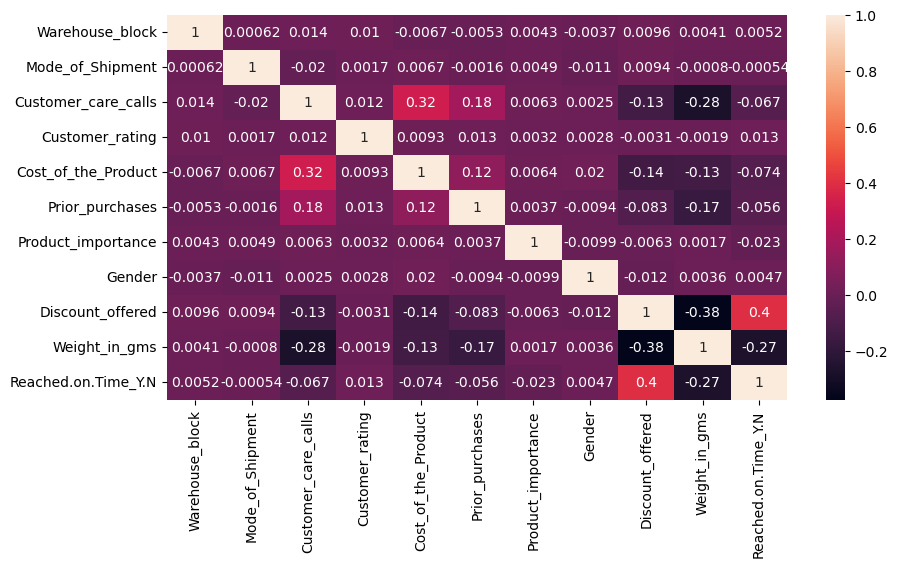

In [28]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)

# Train Test Split

In [29]:
X=df.drop('Reached.on.Time_Y.N',axis=1)
y=df['Reached.on.Time_Y.N']

In [30]:
X.head(1)

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
0,3,0,4,2,177,3,1,0,44,1233


In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

# Model Building

In [32]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(penalty= 'l2')

In [33]:
lr_params={
    'penalty':['l1', 'l2', 'elasticnet']
}

In [34]:
from sklearn.model_selection import GridSearchCV
lr_grd=GridSearchCV(lr,param_grid=lr_params,cv=5)
lr_grd.fit(X_train,y_train)

D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2', 'elasticnet']})

In [35]:
lr_grd.best_params_

{'penalty': 'l2'}

In [36]:
lr.fit(X_train,y_train)

LogisticRegression()

In [37]:
lr.score(X_train,y_train)

0.6367214004613924

In [38]:
lr_pred=lr.predict(X_test)

In [38]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [40]:
accuracy_score(y_test,lr_pred)

0.6333333333333333

In [41]:
classification_report(y_test,lr_pred)

'              precision    recall  f1-score   support\n\n           0       0.54      0.58      0.56      1446\n           1       0.71      0.67      0.69      2184\n\n    accuracy                           0.63      3630\n   macro avg       0.62      0.62      0.62      3630\nweighted avg       0.64      0.63      0.64      3630\n'

In [42]:
cm=confusion_matrix(y_test,lr_pred)

<AxesSubplot:>

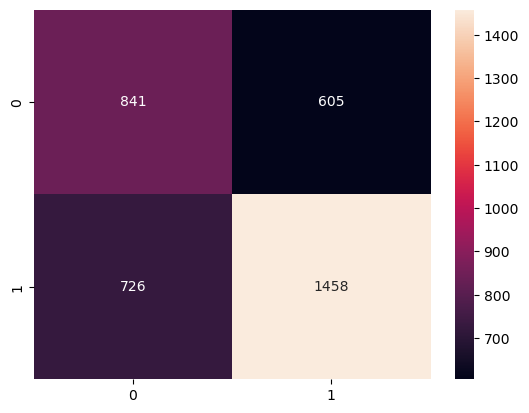

In [43]:
sns.heatmap(cm,annot=True,fmt='d')

# Desicion Tree

In [47]:
from sklearn.tree import DecisionTreeClassifier
dtr=DecisionTreeClassifier()

In [48]:
dtr_param={
    'criterion':['gini', 'entropy'],
    'splitter':['best','random'],
    'max_depth':[5,6,7,8,9],
    'random_state':[0,42]
}

In [49]:
from sklearn.model_selection import GridSearchCV
dtr_grid=GridSearchCV(dtr,param_grid=dtr_param,cv=5)
dtr_grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9], 'random_state': [0, 42],
                         'splitter': ['best', 'random']})

In [50]:
dtr_grid.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'random_state': 0, 'splitter': 'best'}

In [51]:
dtr=DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=0,splitter='best')

In [52]:
dtr.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

In [53]:
dtr_pred=dtr.predict(X_test)

In [54]:
dtr.score(X_train,y_train)

0.6919527751390963

In [55]:
accuracy_score(dtr_pred,y_test)

0.6807162534435262

<AxesSubplot:>

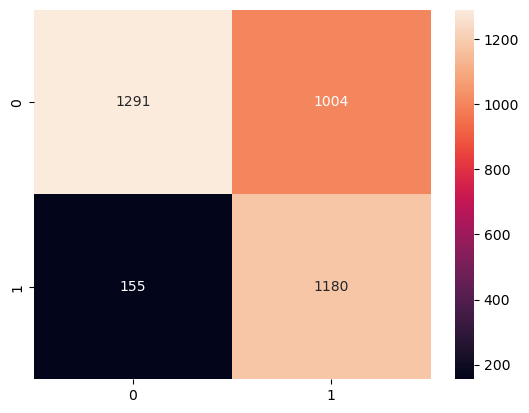

In [56]:
sns.heatmap(confusion_matrix(dtr_pred,y_test),annot=True,fmt='d')

In [57]:
classification_report(dtr_pred,y_test)

'              precision    recall  f1-score   support\n\n           0       0.89      0.56      0.69      2295\n           1       0.54      0.88      0.67      1335\n\n    accuracy                           0.68      3630\n   macro avg       0.72      0.72      0.68      3630\nweighted avg       0.76      0.68      0.68      3630\n'

# Random Forest Regressor

In [59]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

In [62]:
rfc_param={
    'criterion':['gini', 'entropy'],
    'max_depth':[5,6,7,8,9],
    'random_state':[0,42],
    'n_estimators':[100,120,25,75]
}

In [63]:
from sklearn.model_selection import GridSearchCV
grd_rfc=GridSearchCV(rfc,param_grid=rfc_param,cv=5)
grd_rfc.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9],
                         'n_estimators': [100, 120, 25, 75],
                         'random_state': [0, 42]})

In [64]:
grd_rfc.best_params_

{'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 75, 'random_state': 0}

In [65]:
rfc=RandomForestClassifier(criterion= 'entropy', max_depth= 6, n_estimators= 75, random_state= 0)

In [66]:
rfc.fit(X_train,y_train)
rfc.score(X_train,y_train)

0.7015877323924549

In [67]:
rfc_pred=rfc.predict(X_test)

In [68]:
accuracy_score(y_test,rfc_pred)

0.687603305785124

<AxesSubplot:>

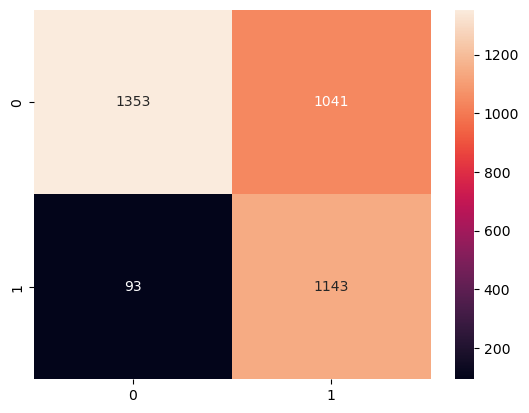

In [69]:
sns.heatmap(confusion_matrix(rfc_pred,y_test),annot=True,fmt='d')

# KNN

In [71]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [72]:
knn_param={
    'n_neighbors':[5,7,8,9],
    'weights':['uniform', 'distance'],
    'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']
}

In [73]:
from sklearn.model_selection import GridSearchCV
grd_knn=GridSearchCV(knn,param_grid=knn_param,cv=5)
grd_knn.fit(X_train,y_train)

D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [5, 7, 8, 9],
                         'weights': ['uniform', 'distance']})

In [74]:
grd_knn.best_params_

{'algorithm': 'auto', 'n_neighbors': 8, 'weights': 'uniform'}

In [75]:
knn=KNeighborsClassifier(algorithm= 'auto', n_neighbors= 8, weights= 'uniform')

In [76]:
knn.fit(X_train,y_train)
knn.score(X_train,y_train)

D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.7439272628579183

In [77]:
knn_pred=knn.predict(X_test)

D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [78]:
accuracy_score(knn_pred,y_test)

0.6647382920110193

# SVM 

In [34]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,y_train)

SVC()

In [36]:
svc_param={
#     'C':[1.0,3.0,5.0,9.0],
    'kernel':['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
    'degree':[3,5,7,8,9]
}

In [ ]:
# from sklearn.model_selection import GridSearchCV
# svc_grd=GridSearchCV(svc,param_grid=svc_param,cv=5)
# svc_grd.fit(X_train,y_train)

In [35]:
svc.score(X_train,y_train)

0.6592482019269914

In [36]:
svc_pred=svc.predict(X_test)

In [39]:
accuracy_score(svc_pred,y_test)

0.6663911845730027